Following the method outlined in http://ai.stanford.edu/~ang/papers/nips02-metric.pdf

First generate some fake data:

In [164]:
%matplotlib inline

import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt

In [165]:
N = 200

x1 = np.random.normal(1,1,N)
y1 = np.random.normal(1,1,N)

x2 = np.random.normal(10,1,N)
y2 = np.random.normal(1,1,N)

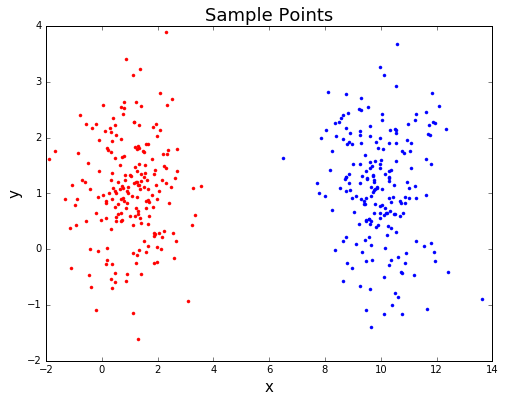

In [166]:
fig = plt.figure()
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.title("Sample Points",size = 18)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
fig.set_size_inches(8, 6)

Define the function to be minimized:

In [167]:
def J(theta):
    function = 0
    for i in range(len(x1)):
        for j in range(len(x2)):
            function += ( theta[0]*(x1[i]-x1[j])**2 + theta[1]*(y1[i]-y1[j])**2 +
                         theta[0]*(x2[i]-x2[j])**2 + theta[1]*(y2[i]-y2[j])**2 )
    constraint = 0
    for i in range(len(x1)):
        j = np.random.randint(0,len(x1)-1)
        constraint += abs(theta[0]*(x1[i]-x2[j])) + abs(theta[1]*(y1[i]-y2[j]))
    
    return function + np.log(constraint)    


In [168]:
def theta1(theta):
    return theta[0]

def theta2(theta):
    return theta[1]

In [169]:
cons = [{'type': 'ineq', 'fun': theta1}, {'type': 'ineq', 'fun': theta2}]

bnds = [(0,None),(0,None)]

In [170]:
theta_init = np.random.random(2)
opt = optimize.minimize(fun=J,x0=theta_init,bounds=bnds,constraints=cons)
theta_min = opt.x
theta_min = theta_min/max(theta_min)
theta_min

array([ 0.12436345,  1.        ])

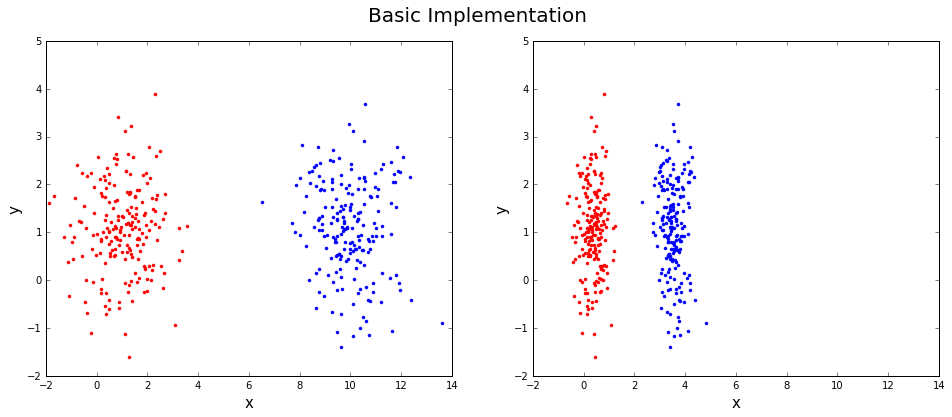

In [171]:
fig = plt.figure()

plt.subplot(121)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.xlim(-2,14)
plt.ylim(-2,5)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(122)
plt.plot(np.sqrt(theta_min[0])*x1,np.sqrt(theta_min[1])*y1,'r.')
plt.plot(np.sqrt(theta_min[0])*x2,np.sqrt(theta_min[1])*y2,'b.')
plt.xlim(-2,14)
plt.ylim(-2,5)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.suptitle("Basic Implementation",size=20)

fig.set_size_inches(16, 6)

Now try with the Large Margin Nearest Neighbor (LMNN), Least Squares Metric Learning (LSML), and Neighborhood Components Analysis (NCA) algorithms https://all-umass.github.io/metric-learn/metric_learn.lmnn.html

In [172]:
from metric_learn import LMNN, LSML_Supervised, NCA

In [173]:
X = np.vstack( (np.hstack((x1,x2)) , np.hstack((y1,y2))) )
X = np.transpose(X)

Y = np.hstack( (np.zeros(N),np.ones(N)) )

In [174]:
lmnn = LMNN(k=2, learn_rate=1e-6)
lmnn_metric=np.matrix(lmnn.fit(X,Y).metric())
lmnn_metric

matrix([[ 0.00028643,  0.00038593],
        [ 0.00038593,  0.00069629]])

In [175]:
X_transform = lmnn_metric * np.transpose(np.matrix(X))

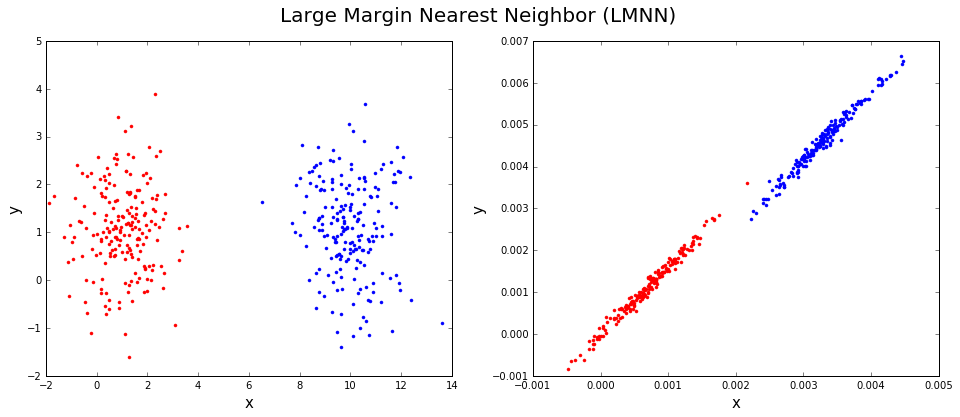

In [176]:
fig = plt.figure()

plt.subplot(121)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.xlim(-2,14)
plt.ylim(-2,5)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(122)
plt.plot(X_transform[0,0:N-1],X_transform[1,0:N-1],'r.')
plt.plot(X_transform[0,N:],X_transform[1,N:],'b.')
#plt.xlim(-2,14)
#plt.ylim(-2,5)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.suptitle("Large Margin Nearest Neighbor (LMNN)",size=20)

fig.set_size_inches(16, 6)

In [177]:
lsml = LSML_Supervised(num_constraints=200)
lsml_metric = np.matrix(lsml.fit(X,Y).metric())
lsml_metric

matrix([[ 21.07343424,   0.02377126],
        [  0.02377126,   0.9033404 ]])

In [178]:
X_transform = lsml_metric * np.transpose(np.matrix(X))

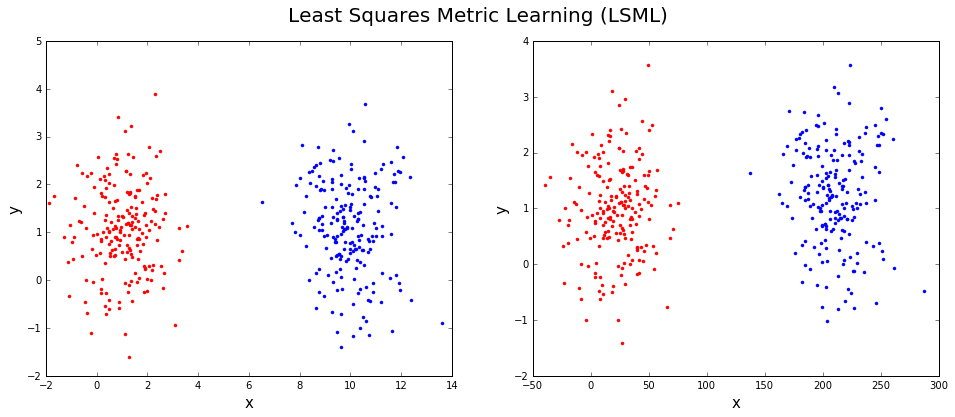

In [179]:
fig = plt.figure()

plt.subplot(121)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.xlim(-2,14)
plt.ylim(-2,5)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(122)
plt.plot(X_transform[0,0:N-1],X_transform[1,0:N-1],'r.')
plt.plot(X_transform[0,N:],X_transform[1,N:],'b.')
#plt.xlim(-2,14)
#plt.ylim(-2,5)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.suptitle("Least Squares Metric Learning (LSML)",size=20)

fig.set_size_inches(16, 6)

In [180]:
nca = NCA(max_iter=1000, learning_rate=0.01)
nca_metric = np.matrix(nca.fit(X, Y).metric())

In [181]:
X_transform = nca_metric * np.transpose(np.matrix(X))

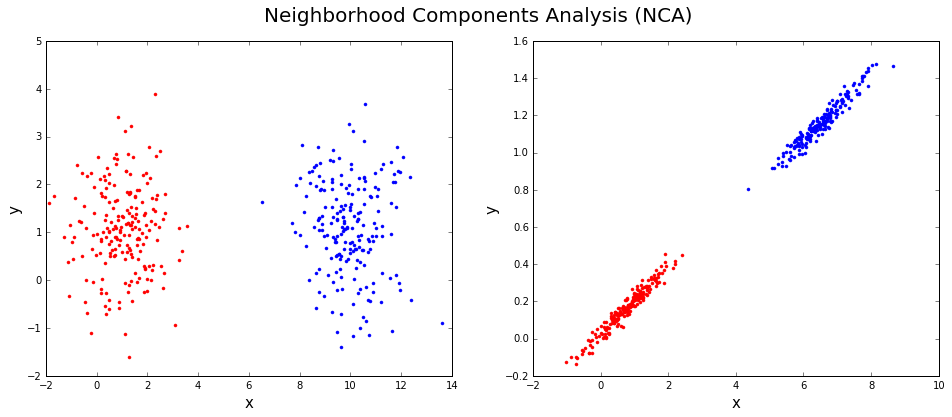

In [182]:
fig = plt.figure()

plt.subplot(121)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.xlim(-2,14)
plt.ylim(-2,5)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(122)
plt.plot(X_transform[0,0:N-1],X_transform[1,0:N-1],'r.')
plt.plot(X_transform[0,N:],X_transform[1,N:],'b.')
#plt.xlim(-2,14)
#plt.ylim(-2,5)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.suptitle("Neighborhood Components Analysis (NCA)",size=20)

fig.set_size_inches(16, 6)

Now let's try things on a more realistic data set...

In [183]:
def data():
    N = np.random.randint(50,300)
    c = 2*np.random.random()
    x1 = np.random.normal(c,0.5,N)
    y1 = np.random.normal(c,0.5,N)
    
    N = np.random.randint(50,300)
    c = 3*np.random.random()
    x2 = np.random.normal(0,1,N)
    y2 = -x2**2 + np.random.normal(c,0.5,N)+2
    theta = 2*np.pi*np.random.random()
    x2 = np.cos(theta)*x2 - np.sin(theta)*y2
    y2 = np.sin(theta)*x2 + np.cos(theta)*y2
    
    N = np.random.randint(50,300)
    c = 2*np.random.random()
    y3 = np.random.normal(0,1,N)
    x3 = y3**2 + np.random.normal(c,0.2,N)-3
    theta = 2*np.pi*np.random.random()
    x3 = np.cos(theta)*x3 - np.sin(theta)*y3
    y3 = np.sin(theta)*x3 + np.cos(theta)*y3
    
    N = np.random.randint(100,600)
    x4 = np.random.normal(-1,2,N)
    y4 = np.random.normal(0,3,N)
    
    return x1,y1,x2,y2,x3,y3,x4,y4

In [184]:
x1,y1,x2,y2,x3,y3,x4,y4 = data()

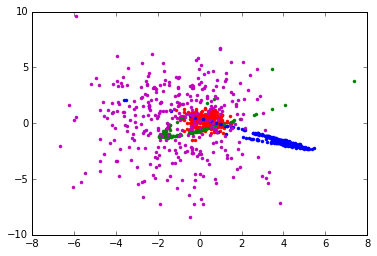

In [185]:
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.plot(x3,y3,'g.')
plt.plot(x4,y4,'m.')

Now assemble the dataset and optimize the metric

In [186]:
X = np.vstack( (np.hstack((x1,x2,x3,x4)) , np.hstack((y1,y2,y3,y4))) )
X = np.transpose(X)

Y = np.hstack( (np.zeros(len(x1)),np.ones(len(x2)),2*np.ones(len(x3)),3*np.ones(len(x4))) )

In [187]:
lmnn = LMNN(k=4, learn_rate=1e-6)
lmnn_metric=np.matrix(lmnn.fit(X,Y).metric())
lmnn_metric

matrix([[ 2.69308646,  0.57335307],
        [ 0.57335307,  3.23158952]])

In [188]:
X_transform = lmnn_metric * np.transpose(np.matrix(X))

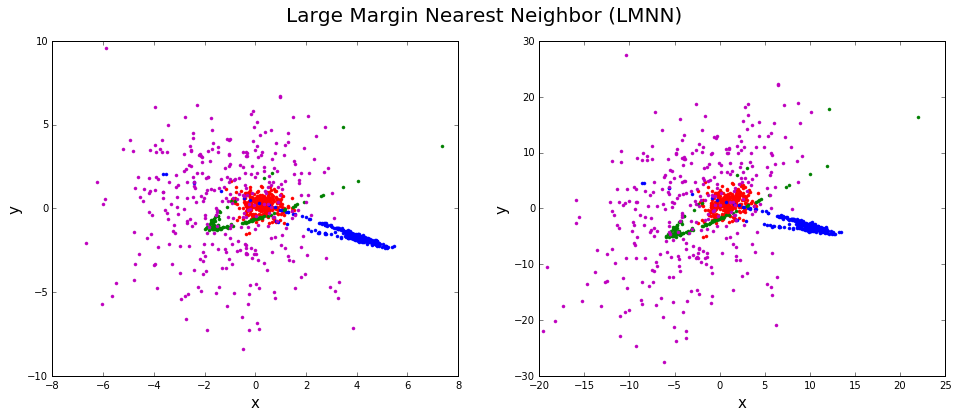

In [189]:
fig = plt.figure()

plt.subplot(121)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.plot(x3,y3,'g.')
plt.plot(x4,y4,'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(122)
plt.plot(X_transform[0,0:len(x1)],X_transform[1,0:len(x1)],'r.')
plt.plot(X_transform[0,len(x1):len(x1)+len(x2)],X_transform[1,len(x1):len(x1)+len(x2)],'b.')
plt.plot(X_transform[0,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],X_transform[1,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],'g.')
plt.plot(X_transform[0,len(x1)+len(x2)+len(x3):],X_transform[1,len(x1)+len(x2)+len(x3):],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.suptitle("Large Margin Nearest Neighbor (LMNN)",size=20)

fig.set_size_inches(16, 6)

In [190]:
lsml = LSML_Supervised(num_constraints=200)
lsml_metric = np.matrix(lsml.fit(X,Y).metric())
lsml_metric

matrix([[ 2.09725636, -0.17812069],
        [-0.17812069,  0.16786368]])

In [191]:
X_transform = lsml_metric * np.transpose(np.matrix(X))

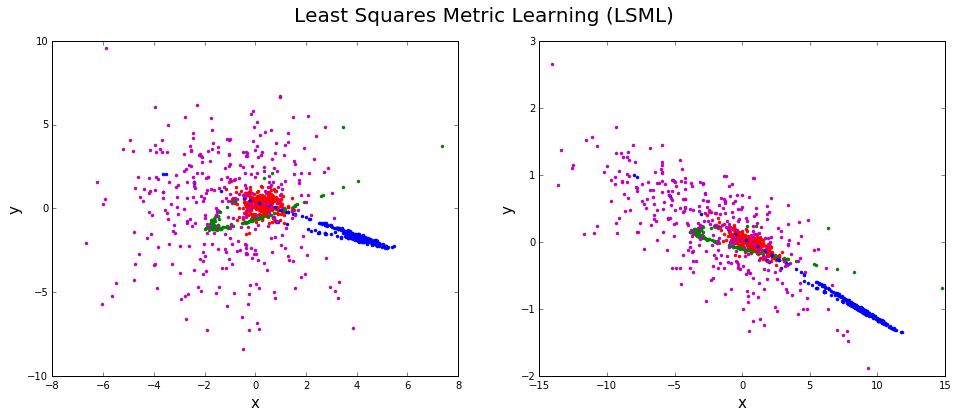

In [192]:
fig = plt.figure()

plt.subplot(121)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.plot(x3,y3,'g.')
plt.plot(x4,y4,'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(122)
plt.plot(X_transform[0,0:len(x1)],X_transform[1,0:len(x1)],'r.')
plt.plot(X_transform[0,len(x1):len(x1)+len(x2)],X_transform[1,len(x1):len(x1)+len(x2)],'b.')
plt.plot(X_transform[0,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],X_transform[1,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],'g.')
plt.plot(X_transform[0,len(x1)+len(x2)+len(x3):],X_transform[1,len(x1)+len(x2)+len(x3):],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.suptitle("Least Squares Metric Learning (LSML)",size=20)

fig.set_size_inches(16, 6)

In [193]:
nca = NCA(max_iter=1000, learning_rate=0.01)
nca_metric = np.matrix(nca.fit(X, Y).metric())

/home/bridget/anaconda3/lib/python3.5/site-packages/metric_learn/nca.py:46: RuntimeWarning: invalid value encountered in true_divide
  softmax /= softmax.sum()


In [194]:
X_transform = nca_metric * np.transpose(np.matrix(X))

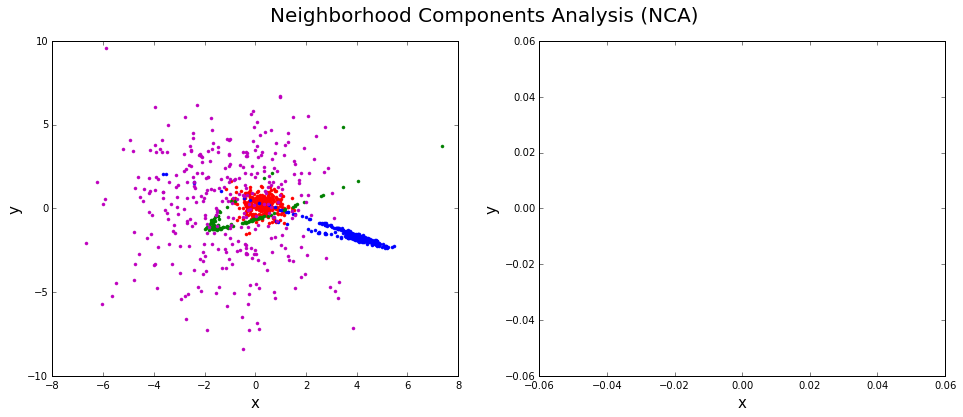

In [195]:
fig = plt.figure()

plt.subplot(121)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.plot(x3,y3,'g.')
plt.plot(x4,y4,'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(122)
plt.plot(X_transform[0,0:len(x1)],X_transform[1,0:len(x1)],'r.')
plt.plot(X_transform[0,len(x1):len(x1)+len(x2)],X_transform[1,len(x1):len(x1)+len(x2)],'b.')
plt.plot(X_transform[0,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],X_transform[1,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],'g.')
plt.plot(X_transform[0,len(x1)+len(x2)+len(x3):],X_transform[1,len(x1)+len(x2)+len(x3):],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.suptitle("Neighborhood Components Analysis (NCA)",size=20)

fig.set_size_inches(16, 6)

Hmm...so it doesn't really work very well if there are overlapping structures in the space.  Could try to add more features...

In [196]:
X = np.vstack( (np.hstack((x1,x2,x3,x4)) , np.hstack((y1,y2,y3,y4)) ,
               (np.hstack((x1**2,x2**2,x3**2,x4**2)) , np.hstack((y1**2,y2**2,y3**2,y4**2)))) )
X = np.transpose(X)

Y = np.hstack( (np.zeros(len(x1)),np.ones(len(x2)),2*np.ones(len(x3)),3*np.ones(len(x4))) )

In [197]:
lmnn = LMNN(k=4, learn_rate=1e-6)
lmnn_metric=np.matrix(lmnn.fit(X,Y).metric())
lmnn_metric

matrix([[ 0.71944635,  0.35971583, -0.12589768, -0.05298807],
        [ 0.35971583,  1.19077387,  0.10656265, -0.13634279],
        [-0.12589768,  0.10656265,  0.11554156, -0.00593332],
        [-0.05298807, -0.13634279, -0.00593332,  0.09704172]])

In [198]:
X_transform = lmnn_metric * np.transpose(np.matrix(X))

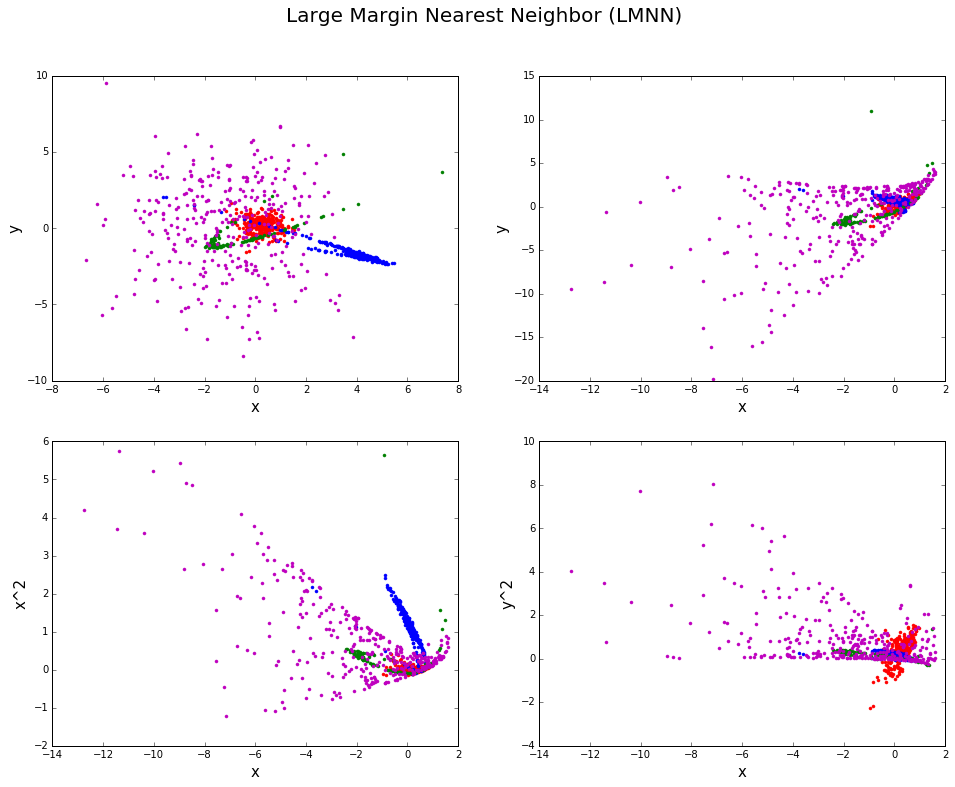

In [199]:
fig = plt.figure()

plt.subplot(221)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.plot(x3,y3,'g.')
plt.plot(x4,y4,'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(222)
plt.plot(X_transform[0,0:len(x1)],X_transform[1,0:len(x1)],'r.')
plt.plot(X_transform[0,len(x1):len(x1)+len(x2)],X_transform[1,len(x1):len(x1)+len(x2)],'b.')
plt.plot(X_transform[0,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],X_transform[1,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],'g.')
plt.plot(X_transform[0,len(x1)+len(x2)+len(x3):],X_transform[1,len(x1)+len(x2)+len(x3):],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(223)
plt.plot(X_transform[0,0:len(x1)],X_transform[2,0:len(x1)],'r.')
plt.plot(X_transform[0,len(x1):len(x1)+len(x2)],X_transform[2,len(x1):len(x1)+len(x2)],'b.')
plt.plot(X_transform[0,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],X_transform[2,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],'g.')
plt.plot(X_transform[0,len(x1)+len(x2)+len(x3):],X_transform[2,len(x1)+len(x2)+len(x3):],'m.')
plt.xlabel("x",size=15)
plt.ylabel("x^2",size=15)

plt.subplot(224)
plt.plot(X_transform[0,0:len(x1)],X_transform[1,0:len(x1)],'r.')
plt.plot(X_transform[0,len(x1):len(x1)+len(x2)],X_transform[3,len(x1):len(x1)+len(x2)],'b.')
plt.plot(X_transform[0,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],X_transform[3,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],'g.')
plt.plot(X_transform[0,len(x1)+len(x2)+len(x3):],X_transform[3,len(x1)+len(x2)+len(x3):],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y^2",size=15)

plt.suptitle("Large Margin Nearest Neighbor (LMNN)",size=20)

fig.set_size_inches(16, 12)

Okay, so maybe adding more features helps with separating the clusters (but this is true irrespective of using the metric optimization).  Anyway, we can test whether or not this metric optimization helps clustering with K-means, so let's go back to the simpler problem:

In [200]:
x1,y1,x2,y2,x3,y3,x4,y4 = data()

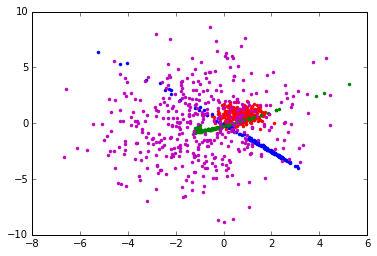

In [201]:
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.plot(x3,y3,'g.')
plt.plot(x4,y4,'m.')

In [202]:
X = np.vstack( (np.hstack((x1,x2,x3,x4)) , np.hstack((y1,y2,y3,y4))) )
X = np.transpose(X)

Y = np.hstack( (np.zeros(len(x1)),np.ones(len(x2)),2*np.ones(len(x3)),3*np.ones(len(x4))) )

In [203]:
lmnn = LMNN(k=4, learn_rate=1e-6)
lmnn_metric=np.matrix(lmnn.fit(X,Y).metric())
lmnn_metric

matrix([[ 5.58717192, -0.2594879 ],
        [-0.2594879 ,  5.45614071]])

In [204]:
X_transform = lmnn_metric * np.transpose(np.matrix(X))

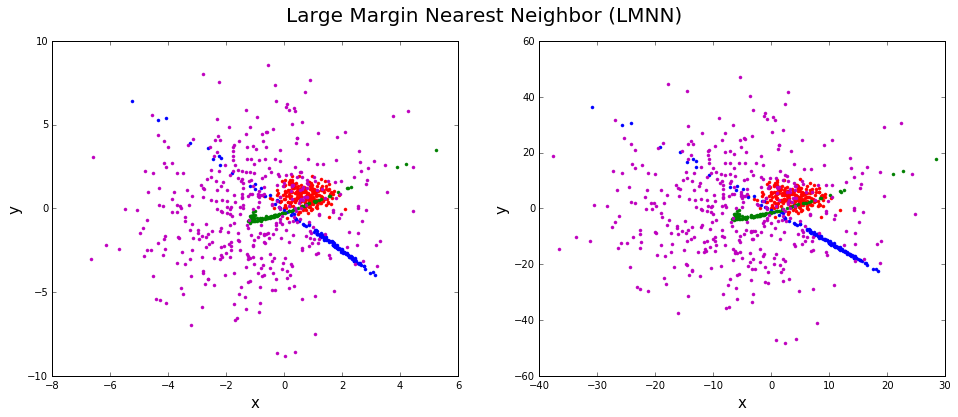

In [205]:
fig = plt.figure()

plt.subplot(121)
plt.plot(x1,y1,'r.')
plt.plot(x2,y2,'b.')
plt.plot(x3,y3,'g.')
plt.plot(x4,y4,'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(122)
plt.plot(X_transform[0,0:len(x1)],X_transform[1,0:len(x1)],'r.')
plt.plot(X_transform[0,len(x1):len(x1)+len(x2)],X_transform[1,len(x1):len(x1)+len(x2)],'b.')
plt.plot(X_transform[0,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],X_transform[1,len(x1)+len(x2):len(x1)+len(x2)+len(x3)],'g.')
plt.plot(X_transform[0,len(x1)+len(x2)+len(x3):],X_transform[1,len(x1)+len(x2)+len(x3):],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.suptitle("Large Margin Nearest Neighbor (LMNN)",size=20)

fig.set_size_inches(16, 6)

In [379]:
x1t,y1t,x2t,y2t,x3t,y3t,x4t,y4t = data()

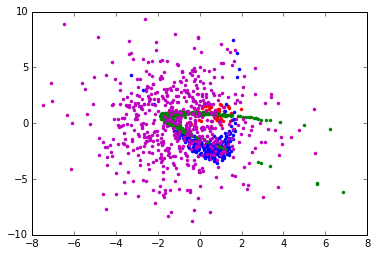

In [380]:
plt.plot(x1t,y1t,'r.')
plt.plot(x2t,y2t,'b.')
plt.plot(x3t,y3t,'g.')
plt.plot(x4t,y4t,'m.')

In [381]:
X = np.vstack( (np.hstack((x1t,x2t,x3t,x4t)) , np.hstack((y1t,y2t,y3t,y4t))) )
X = np.transpose(X)

Y = np.hstack( (np.zeros(len(x1t)),np.ones(len(x2t)),2*np.ones(len(x3t)),3*np.ones(len(x4t))) )

In [382]:
lmnn = LMNN(k=4, learn_rate=1e-6)
lmnn_metric=np.matrix(lmnn.fit(X,Y).metric())
lmnn_metric

matrix([[ 7.85648532,  1.44947314],
        [ 1.44947314,  3.17058709]])

In [383]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.mixture import GMM

In [384]:
Y_pred = KMeans(n_clusters=4).fit_predict(X)
#Y_pred_DB = DBSCAN(min_samples=20).fit(X).labels_
Y_pred_GM = GMM(n_components=4).fit_predict(X)

In [385]:
print(metrics.normalized_mutual_info_score(Y_pred, Y),
metrics.normalized_mutual_info_score(Y_pred_GM, Y))

0.212432501986 0.267221891185


In [386]:
xs=np.hstack((x1t,x2t,x3t,x4t))
ys = np.hstack((y1t,y2t,y3t,y4t))

In [387]:
Y_pred_trans = KMeans(n_clusters=4).fit_predict(np.matrix(X) * np.transpose(lmnn_metric))
#Y_pred_trans_DB = DBSCAN(min_samples=10).fit(np.matrix(X) * np.transpose(lmnn_metric)).labels_
Y_pred_trans_GM = GMM(n_components=4).fit_predict(np.matrix(X) * np.transpose(lmnn_metric))

In [388]:
print(metrics.normalized_mutual_info_score(Y_pred_trans, Y),
metrics.normalized_mutual_info_score(Y_pred_trans_GM, Y))

0.149670603386 0.156671169608


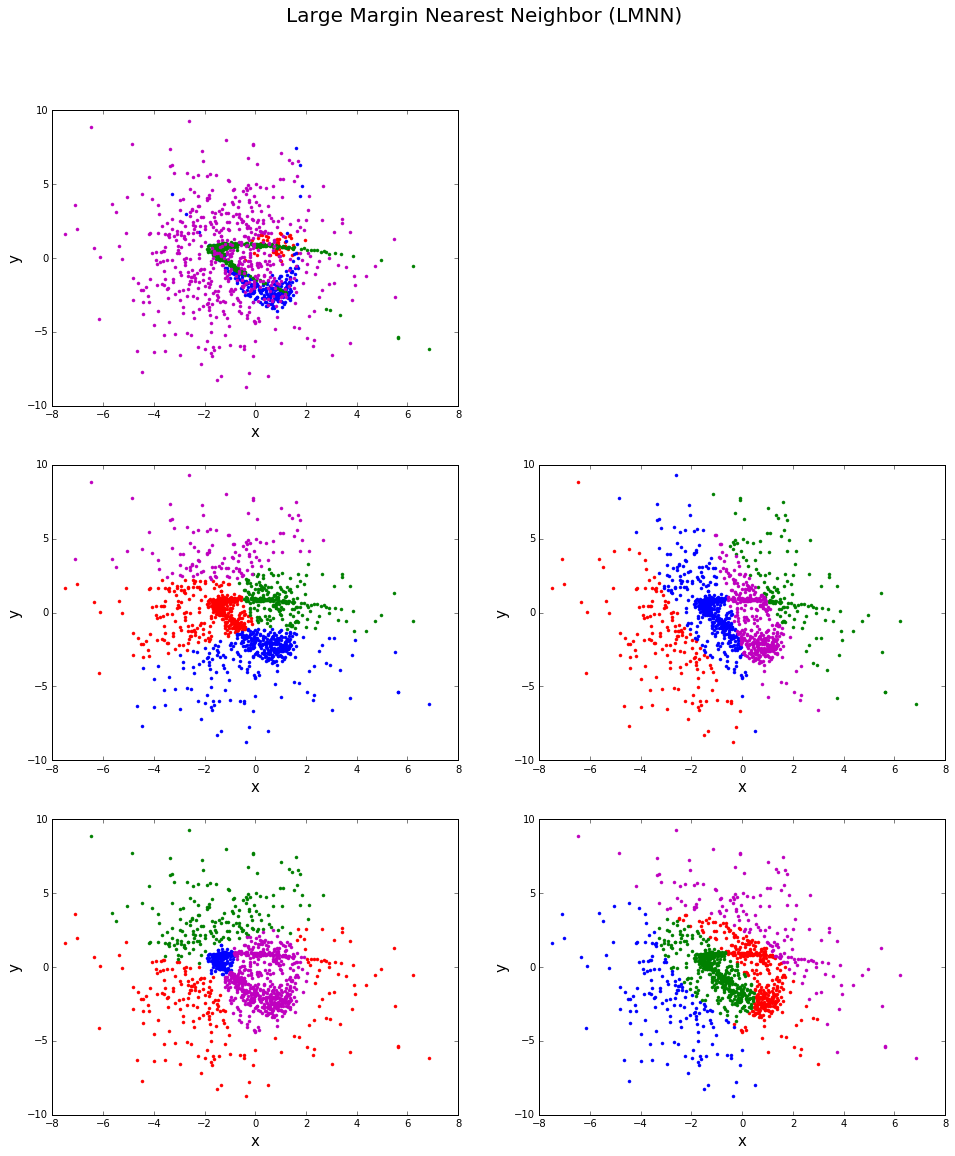

In [389]:
fig = plt.figure()

plt.subplot(321)
plt.plot(x1t,y1t,'r.')
plt.plot(x2t,y2t,'b.')
plt.plot(x3t,y3t,'g.')
plt.plot(x4t,y4t,'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(323)
plt.plot(xs[Y_pred==0],ys[Y_pred==0],'r.')
plt.plot(xs[Y_pred==1],ys[Y_pred==1],'b.')
plt.plot(xs[Y_pred==2],ys[Y_pred==2],'g.')
plt.plot(xs[Y_pred==3],ys[Y_pred==3],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(324)
plt.plot(xs[Y_pred_trans==0],ys[Y_pred_trans==0],'r.')
plt.plot(xs[Y_pred_trans==1],ys[Y_pred_trans==1],'b.')
plt.plot(xs[Y_pred_trans==2],ys[Y_pred_trans==2],'g.')
plt.plot(xs[Y_pred_trans==3],ys[Y_pred_trans==3],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(325)
plt.plot(xs[Y_pred_GM==0],ys[Y_pred_GM==0],'r.')
plt.plot(xs[Y_pred_GM==1],ys[Y_pred_GM==1],'b.')
plt.plot(xs[Y_pred_GM==2],ys[Y_pred_GM==2],'g.')
plt.plot(xs[Y_pred_GM==3],ys[Y_pred_GM==3],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.subplot(326)
plt.plot(xs[Y_pred_trans_GM==0],ys[Y_pred_trans_GM==0],'r.')
plt.plot(xs[Y_pred_trans_GM==1],ys[Y_pred_trans_GM==1],'b.')
plt.plot(xs[Y_pred_trans_GM==2],ys[Y_pred_trans_GM==2],'g.')
plt.plot(xs[Y_pred_trans_GM==3],ys[Y_pred_trans_GM==3],'m.')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

plt.suptitle("Large Margin Nearest Neighbor (LMNN)",size=20)

fig.set_size_inches(16, 18)